<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

In [4]:
# shape of the dataset
df.shape

(2111, 17)

In [3]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
# check for missing values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


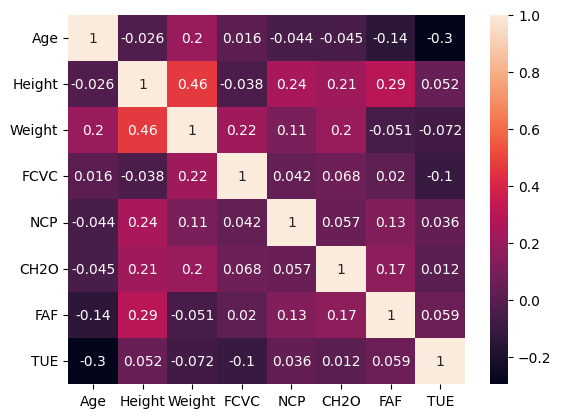

In [7]:
# creating a heatmap to show correlation
# creating a heatmap to show correlation
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [8]:
# splitting the dataset into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [9]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
# modelling using SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [13]:
# Convert categorical features (like Gender) into numerical using one-hot encoding
x = pd.get_dummies(df.iloc[:,:-1], drop_first=True) # drop_first to avoid multicollinearity
y = df.iloc[:,-1]

# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelling using SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

svm = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print(accuracy_score(y_test, y_pred))


0.8652482269503546


In [14]:
svm = make_pipeline(StandardScaler(), SVC(C=1.0, kernel='linear'))
scores = cross_val_score(svm, x, y, cv=10, scoring='accuracy')
print(scores.mean())


0.9432173835285701


In [15]:
# use svm to check the k nth neighbor
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores.mean())

0.8782772958955556
